In [ ]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import keras
!pip install bert-for-tf2
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
try:
    %TensorFlow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
#import bert

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/spam_assassin.csv',encoding='iso-8859-1', names=['messages','labels', 'target'])
df.isnull().values.any()
df.shape

Mounted at /content/gdrive


(5797, 3)

In [ ]:
df.head()

,messages,labels,target
0,text,target,NaN
1,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,NaN
2,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,NaN
3,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,NaN
4,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,NaN


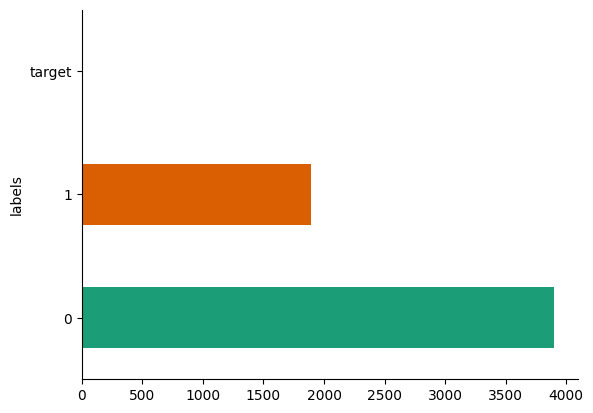

In [ ]:
# @title labels

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
!pip install bert-for-tf2
!pip install sentencepiece
!pip install bert
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

  Using cached bert-for-tf2-0.14.9.tar.gz (41 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert: filename=bert-2.2.0-py3-none-any.whl size=3744 sha256=ba154082b97ebfc63e0d652afcdcf64668a18a997673623573a2eaad34f9e94c
  Stored in directory: /root/.cache/pip/wheels/55/82/8d/a9bad0b8280eb858aa3dcb4e617ee5a1653fdeb239e1e8c3fe
  Created wheel for erlastic: filename=erlastic-2.0.0-py3-none-any.whl size=6780 sha256=a34305c577b66fc029208124ef1fc7c0b993d8077a6

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)
#CLean all emails
emails = []
sentences = list(df['messages'])
for sen in sentences:
    emails.append(preprocess_text(sen))

In [ ]:
import numpy as np
y = df['labels']
y = np.array(list(map(lambda x: 1 if x=="1" else 0, y)))

print(emails[10])

From contractor goldenbay com cy Tue Jul Return Path Delivered To yyyy localhost netnoteinc com Received from localhost localhost by phobos labs netnoteinc com Postfix with ESMTP id BBB CC for Tue Jul EDT Received from dogma slashnull org by localhost with IMAP fetchmail for jm localhost single drop Tue Jul IST Received from mandark labs netnoteinc com by dogma slashnull org with ESMTP id NMWA for Tue Jul Received from post unedcol cefetes br by mandark labs netnoteinc com with ESMTP id NMVMp for Tue Jul Received from main gate pl by post unedcol cefetes br with SMTP Microsoft Exchange Internet Mail Service Version id K NJ Mon Jul Message Id To From Business Services Subject Qualified Potential Clients For Your Industry Date Mon Jul MIME Version Mailer Microsoft Outlook Express Content Type text html charset iso Content Transfer Encoding quoted printable Online Marketing Strategies Need More Clients Increase Your Sales Every Month Targeted mail Marketing Is Proven Method For Return Sal

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(emails).toarray()
feature_names = tfidf.get_feature_names_out()

In [ ]:
!pip install transformers
from transformers import BertTokenizer

# Load the pre-trained tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
!pip install transformers
from transformers import BertTokenizer
import tensorflow_hub as hub

# Load the pre-trained BERT layer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)

# Load the pre-trained tokenizer (using the correct method)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example usage:
text = "This is a test sentence."
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print("Tokens:", tokens)
print("Token IDs:", token_ids)

Tokens: ['this', 'is', 'a', 'test', 'sentence', '.']
Token IDs: [2023, 2003, 1037, 3231, 6251, 1012]


In [ ]:
tokenizer.tokenize("don't be so judgmental")  ## Below is the output
tokenizer.convert_tokens_to_ids(tokenizer.tokenize("dont be so judgmental"))

[2123, 2102, 2022, 2061, 8689, 2389]

___________________________________________________________________________


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(emails).toarray()
feature_names = tfidf.get_feature_names_out()

# Grey Wolf Optimization for feature selection
class GWO_FeatureSelector:
    def __init__(self, n_features, n_wolves=10, max_iter=50):
        self.n_features = n_features
        self.n_wolves = n_wolves
        self.max_iter = max_iter
        self.alpha_score = float('inf')
        self.alpha_pos = None
        self.beta_pos = None
        self.delta_pos = None

    def fitness_function(self, position, X, y):
        selected = position > 0.5
        if np.sum(selected) == 0:
            return float('inf')

        from sklearn.model_selection import train_test_split
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import accuracy_score

        X_selected = X[:, selected]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(n_estimators=50, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # We want to maximize accuracy and minimize number of features
        return (1 - accuracy) + 0.1 * (np.sum(selected) / self.n_features)

    def optimize(self, X, y):
        dim = X.shape[1]
        wolves = np.random.rand(self.n_wolves, dim)
        fitness = np.array([self.fitness_function(wolf, X, y) for wolf in wolves])

        # Initialize alpha, beta, delta
        sorted_idx = np.argsort(fitness)
        self.alpha_pos = wolves[sorted_idx[0]]
        self.beta_pos = wolves[sorted_idx[1]]
        self.delta_pos = wolves[sorted_idx[2]]
        self.alpha_score = fitness[sorted_idx[0]]
        beta_score = fitness[sorted_idx[1]]
        delta_score = fitness[sorted_idx[2]]

        # Optimization loop
        for iter in range(self.max_iter):
            a = 2 - iter * (2 / self.max_iter)  # a decreases linearly from 2 to 0

            for i in range(self.n_wolves):
                for j in range(dim):
                    # Update positions
                    r1 = np.random.rand()
                    r2 = np.random.rand()

                    A1 = 2 * a * r1 - a
                    C1 = 2 * r2

                    D_alpha = abs(C1 * self.alpha_pos[j] - wolves[i,j])
                    X1 = self.alpha_pos[j] - A1 * D_alpha

                    r1 = np.random.rand()
                    r2 = np.random.rand()

                    A2 = 2 * a * r1 - a
                    C2 = 2 * r2

                    D_beta = abs(C2 * self.beta_pos[j] - wolves[i,j])
                    X2 = self.beta_pos[j] - A2 * D_beta

                    r1 = np.random.rand()
                    r2 = np.random.rand()

                    A3 = 2 * a * r1 - a
                    C3 = 2 * r2

                    D_delta = abs(C3 * self.delta_pos[j] - wolves[i,j])
                    X3 = self.delta_pos[j] - A3 * D_delta

                    wolves[i,j] = (X1 + X2 + X3) / 3

                # Clip to [0,1]
                wolves[i] = np.clip(wolves[i], 0, 1)

                # Calculate new fitness
                current_fitness = self.fitness_function(wolves[i], X, y)

                # Update alpha, beta, delta
                if current_fitness < self.alpha_score:
                    self.alpha_score = current_fitness
                    self.alpha_pos = wolves[i].copy()
                elif current_fitness < beta_score:
                    beta_score = current_fitness
                    self.beta_pos = wolves[i].copy()
                elif current_fitness < delta_score:
                    delta_score = current_fitness
                    self.delta_pos = wolves[i].copy()

            if iter % 10 == 0:
                print(f'Iteration {iter}, Best Fitness: {self.alpha_score}, Features Selected: {np.sum(self.alpha_pos > 0.5)}')

        # Return selected features
        selected = self.alpha_pos > 0.5
        return selected, self.alpha_pos



In [ ]:
# Apply GWO feature selection
print("\nStarting GWO Feature Selection...")
gwo_fs = GWO_FeatureSelector(n_features=X_tfidf.shape[1], n_wolves=15, max_iter=50)
selected_features, feature_weights = gwo_fs.optimize(X_tfidf, y)

# Display selected features
selected_indices = np.where(selected_features)[0]
print("\nSelected Features:")
for idx in selected_indices:
    print(f"Feature: {feature_names[idx]}, Type: TF-IDF Score, Weight: {feature_weights[idx]:.4f}")

print(f"\nTotal Features Selected: {len(selected_indices)} out of {X_tfidf.shape[1]}")



Starting GWO Feature Selection...
Iteration 0, Best Fitness: 0.04387241379310341, Features Selected: 387
Iteration 10, Best Fitness: 0.026796551724137946, Features Selected: 199
Iteration 20, Best Fitness: 0.01953448275862073, Features Selected: 135
Iteration 30, Best Fitness: 0.01671034482758619, Features Selected: 124
Iteration 40, Best Fitness: 0.01671034482758619, Features Selected: 124

Selected Features:
Feature: actually, Type: TF-IDF Score, Weight: 0.8219
Feature: ad, Type: TF-IDF Score, Weight: 0.5317
Feature: ae, Type: TF-IDF Score, Weight: 0.5714
Feature: af, Type: TF-IDF Score, Weight: 0.6202
Feature: allow, Type: TF-IDF Score, Weight: 0.8512
Feature: always, Type: TF-IDF Score, Weight: 0.8674
Feature: amp, Type: TF-IDF Score, Weight: 0.9738
Feature: aol, Type: TF-IDF Score, Weight: 0.6953
Feature: au, Type: TF-IDF Score, Weight: 0.9940
Feature: available, Type: TF-IDF Score, Weight: 0.8888
Feature: below, Type: TF-IDF Score, Weight: 0.5608
Feature: business, Type: TF-IDF 

In [ ]:
# Prepare data with selected features
from sklearn.model_selection import train_test_split # Import train_test_split
X_selected = X_tfidf[:, selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
# Add class weights to handle imbalance
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}


In [ ]:
# Enhanced CNN model with regularization
from tensorflow.keras import regularizers # Import regularizers

model = keras.Sequential([
    layers.Reshape(input_shape=(X_train.shape[1],), target_shape=(X_train.shape[1], 1)),
    layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.3),

    layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test),
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.7574 - auc: 0.8542 - loss: 2.9252 - precision: 0.5882 - recall: 0.8169 - val_accuracy: 0.3284 - val_auc: 0.9459 - val_loss: 3.3046 - val_precision: 0.3284 - val_recall: 1.0000
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.8976 - auc: 0.9704 - loss: 2.4354 - precision: 0.7907 - recall: 0.9342 - val_accuracy: 0.3284 - val_auc: 0.9770 - val_loss: 3.3330 - val_precision: 0.3284 - val_recall: 1.0000
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9247 - auc: 0.9790 - loss: 2.1765 - precision: 0.8411 - recall: 0.9386 - val_accuracy: 0.3284 - val_auc: 0.9831 - val_loss: 3.2294 - val_precision: 0.3284 - val_recall: 1.0000
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9345 - auc: 0.9845 - loss: 1.9560 - precision: 0.8633 - recall: 0.9474 - val_accuracy: 0.3284 - val_auc: 0.9881 - val_loss: 3.0644 - val_precision: 0.3284 - val_recall: 1.0000
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9929 - auc: 0.9992 - loss: 0.2231 - precision: 0.9886 - recall: 0.9900

Test Loss: 0.2310
Test Accuracy: 0.9888
Test Precision: 0.9817
Test Recall: 0.9843
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       779
           1       0.98      0.98      0.98       381

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



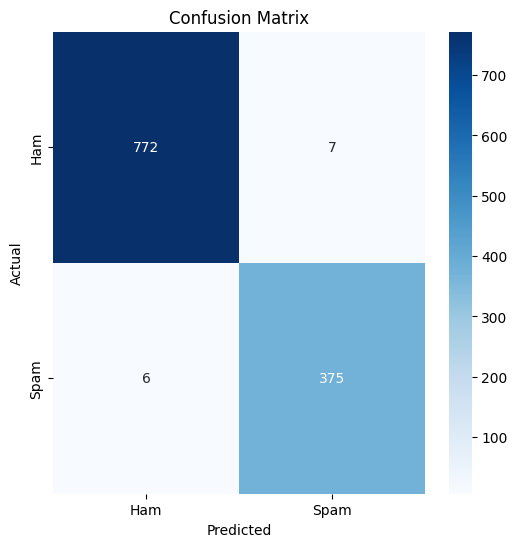

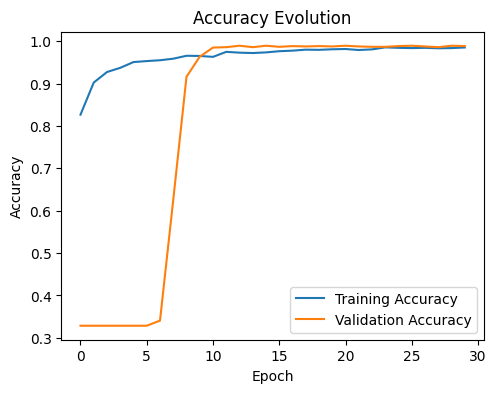

In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix # Import classification_report and confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_results = model.evaluate(X_test, y_test)
print(f'\nTest Loss: {test_results[0]:.4f}')
print(f'Test Accuracy: {test_results[1]:.4f}')
print(f'Test Precision: {test_results[2]:.4f}')
print(f'Test Recall: {test_results[3]:.4f}')

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn)
print(f"False Positive Rate (FPR): {fpr:.4f}")

False Positive Rate (FPR): 0.0090


In [ ]:
# prompt: print error rate

# Calculate Error Rate
# Error Rate = (FP + FN) / Total Number of Samples
error_rate = (fp + fn) / (tn + fp + fn + tp)
print(f"Error Rate: {error_rate:.4f}")


Error Rate: 0.0112
